In [64]:
import os
import numpy as np
import sys

import matplotlib.font_manager
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import seaborn
#plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 22
plt.rcParams["font.weight"] = "normal"

from collections import Counter
from itertools import count
from random import randint
from pathlib import Path
import math

#np.set_printoptions(threshold=np.inf)

############################ USER INPUTS #############################
filename = os.path.join('/Users/ljb841@student.bham.ac.uk/fispact/WORKSHOP/uBB/approach_1/protons/vol6/ss_1hr1ua1g/uBB_ss.grn')
image_directory =       '/Users/ljb841@student.bham.ac.uk/fispact/WORKSHOP/uBB/approach_1/protons/vol6/ss_1hr1ua1g'
no_of_timesteps =  14 # including irradiation timestep

no_of_activity_isotopes = 7
no_of_dose_isotopes = 4
######################################################################

filename2 = os.path.join('/Users/ljb841@student.bham.ac.uk/fispact/WORKSHOP/uBB/approach_1/protons/vol6/cu_1hr1ua1g/uBB_cu.grn')
image_directory2 = '/Users/ljb841@student.bham.ac.uk/fispact/WORKSHOP/uBB/approach_1/protons/vol6'


In [65]:
#######################activity data#################################

f=open(filename,"r")
lines=f.readlines()
timescale=[]
activity_total = []
#activity_1 = []
#activity_2 = []
#activity_3 = []
#activity_4 = []
#activity_5 = []
#activity_6 = []
#activity_7 = []
#activity_8 = []
#activity_9 = []
#activity_10 = []
for x in lines[8:8+no_of_timesteps]:
    timescale.append(float(x.split()[1]))
    activity_total.append(float(x.split()[3]))
    #activity_1.append(float(x.split()[4]))
    #activity_2.append(float(x.split()[5]))
    #activity_3.append(float(x.split()[6]))
    #activity_4.append(float(x.split()[7]))
    #activity_5.append(float(x.split()[8]))
    #activity_6.append(float(x.split()[9]))
    #activity_7.append(float(x.split()[10]))
    #activity_8.append(float(x.split()[11]))
    #activity_9.append(float(x.split()[12]))
    #activity_10.append(float(x.split()[13]))
isotopes_list = []
for z in lines[7:8]:
    isotopes_list.append(z.split()[4::1])
    isotopes=isotopes_list[0]
total = isotopes[0]
#isotope_1 = ' '.join(isotopes[1:3])
#isotope_2 = ' '.join(isotopes[3:5])
#isotope_3 = ' '.join(isotopes[5:7])
#isotope_4 = ' '.join(isotopes[7:9])
#isotope_5 = ' '.join(isotopes[9:11])
#isotope_6 = ' '.join(isotopes[11:13])
#isotope_7 = ' '.join(isotopes[13:15])
#isotope_8 = ' '.join(isotopes[9:10])
#isotope_9 = ' '.join(isotopes[10:11])
#isotope_10 = ' '.join(isotopes[19:21])
f.close()

###################dose data#####################################

dose_total = []
#dose_1 = []
#dose_2 = []
#dose_3 = []
#dose_4 = []
#dose_5 = []
#dose_6 = []
#dose_7 = []
#dose_8 = []
#dose_9 = []
#dose_10 = []
for x in lines[36+no_of_timesteps:50+no_of_timesteps]:
    dose_total.append(float(x.split()[3]))
    #dose_1.append(float(x.split()[4]))
    #dose_2.append(float(x.split()[5]))
    #dose_3.append(float(x.split()[6]))
    #dose_4.append(float(x.split()[7]))
    #dose_5.append(float(x.split()[8]))
    #dose_6.append(float(x.split()[9]))
    #dose_7.append(float(x.split()[10]))
    #dose_8.append(float(x.split()[11]))
    #dose_9.append(float(x.split()[12]))
    #dose_10.append(float(x.split()[13]))
isotopes_listb = []
for z in lines[35+no_of_timesteps:36+no_of_timesteps]:
    isotopes_listb.append(z.split()[4::1])
    isotopes_b=isotopes_listb[0]
#isotope_1b = ' '.join(isotopes_b[1:3])
#isotope_2b = ' '.join(isotopes_b[3:5])
#isotope_3b = ' '.join(isotopes_b[5:7])
#isotope_4b = ' '.join(isotopes_b[7:9])
#isotope_5b = ' '.join(isotopes_b[5:6])
#isotope_6b = ' '.join(isotopes_b[6:7])
#isotope_7b = ' '.join(isotopes_b[7:8])
#isotope_8b = ' '.join(isotopes_b[8:9])
#isotope_9b = ' '.join(isotopes_b[17:19])
#isotope_10b = ' '.join(isotopes_b[19:21])
f.close()

print(total,activity_total)
print(total,dose_total)

timescale_days = np.array(timescale)*365


Total [174057000000.0, 134281000000.0, 96395800000.0, 20273100000.0, 2015420000.0, 761488000.0, 556243000.0, 364873000.0, 266464000.0, 152783000.0, 82551000.0, 7042790.0, 1572540.0, 112511.0]
Total [108.399, 88.0135, 63.6878, 13.4422, 1.18765, 0.517038, 0.444098, 0.338038, 0.252325, 0.148018, 0.0790694, 0.00359186, 2.767e-05, 3.79588e-08]


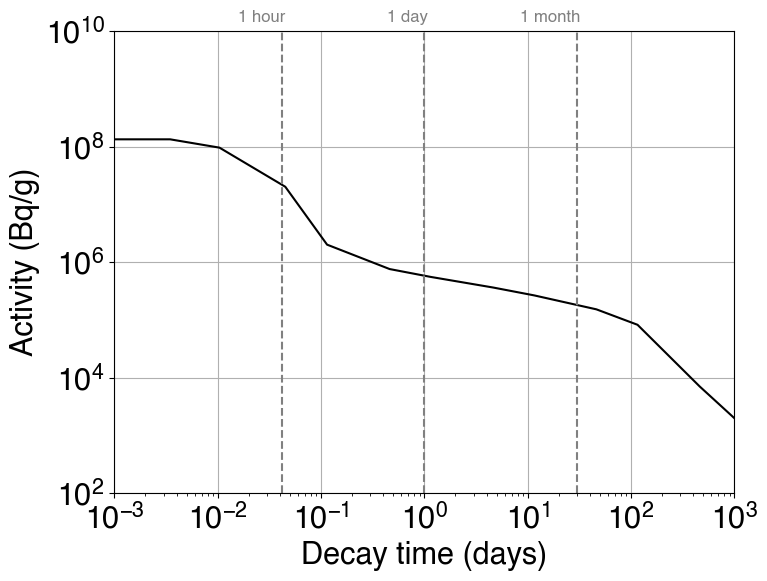

In [66]:
#PLOT ISOTOPIC ACTIVITY

fig, ax1 = plt.subplots()
ax1.set_xlabel('Decay time (days)') 
ax1.set_ylabel('Activity (Bq/g)')
#ax1.set_title('DPA vs. Depth')
ax1.tick_params(axis='y')
#ax1.set_xticks([1,1e0,1e1,1e2])
ax1.set_xlim(1e-3,1e3)
ax1.set_xscale("log")
ax1.set_ylim(1e2,1e10)
#ax1.set_yticks([1e6,1e8,1e10,1e12,1e14])
ax1.set_yscale("log")

ax1.plot(timescale_days, 1e-3*np.array(activity_total) , 'k-' , label=total,     linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_1), 'Blue',     label=isotope_1, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_2), 'GoldenRod',label=isotope_2, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_3), 'Maroon',   label=isotope_3, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_4), 'Red',      label=isotope_4, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_5), 'Magenta',  label=isotope_5, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_6), 'Orange',   label=isotope_6, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_7), 'Gray',     label=isotope_7, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_8), 'SeaGreen', label=isotope_8, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_9), 'LightGray',label=isotope_9, linewidth=1.5)
#ax1.plot(timescale_days, 1e-3*np.array(activity_10), 'Yellow',  label=isotope_10,linewidth=1.5)

ax1.axvline(x=0.04167, ls='--', c='grey')
ax1.axvline(x=1e0, ls='--', c='grey')
ax1.axvline(x=30, ls='--', c='grey')
ax1.text(0.2, 1.02, '1 hour', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.44, 1.02, '1 day', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.654, 1.02, '1 month', transform = ax1.transAxes, fontsize=12, c='grey')

ax1.grid(which='major')
#ax1.legend(loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0, frameon=False, fontsize=11)
   
fig.set_size_inches((8, 6))
fig.savefig(os.path.join(image_directory, 'total_activity.png'), transparent=False, bbox_inches='tight')

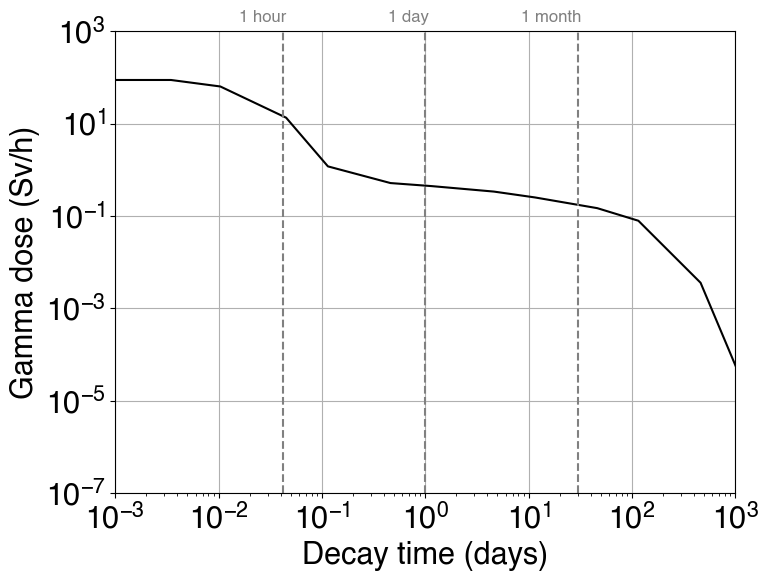

In [67]:
#PLOT ISOTOPIC DOSE

background = [1e-7]*no_of_timesteps

fig, ax1 = plt.subplots()
ax1.set_xlabel('Decay time (days)') 
ax1.set_ylabel('Gamma dose (Sv/h)')
#ax1.set_title('DPA vs. Depth')
ax1.tick_params(axis='y')
#ax1.set_xticks([1,1e0,1e1,1e2])
ax1.set_xlim(1e-3,1e3)
ax1.set_xscale("log")
ax1.set_ylim(1e-7,1e3)
#ax1.set_yticks([1e6,1e8,1e10,1e12,1e14])
ax1.set_yscale("log")

ax1.plot(timescale_days, (dose_total),'k-' ,      label=total,      linewidth=1.5)
#ax1.plot(timescale_days, (dose_1),    'Blue',     label=isotope_1b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_2),    'GoldenRod',label=isotope_2b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_3),    'Maroon',   label=isotope_3b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_4),    'Red',      label=isotope_4b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_5),    'Magenta',  label=isotope_5b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_6),    'Orange',   label=isotope_6b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_7),    'Gray',     label=isotope_7b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_8),    'LightGray',label=isotope_8b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_9),    'SeaGreen', label=isotope_9b, linewidth=1.5)
#ax1.plot(timescale_days, (dose_10),    'Yellow',  label=isotope_10b,linewidth=1.5)

ax1.axvline(x=0.04167, ls='--', c='grey')
ax1.axvline(x=1e0, ls='--', c='grey')
ax1.axvline(x=30, ls='--', c='grey')
ax1.text(0.2, 1.02, '1 hour', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.44, 1.02, '1 day', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.654, 1.02, '1 month', transform = ax1.transAxes, fontsize=12, c='grey')

ax1.grid(which='major')
#ax1.legend(loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0, frameon=False, fontsize=11)
   
fig.set_size_inches((8, 6))
fig.savefig(os.path.join(image_directory, 'total_dose.png'), transparent=False, bbox_inches='tight')

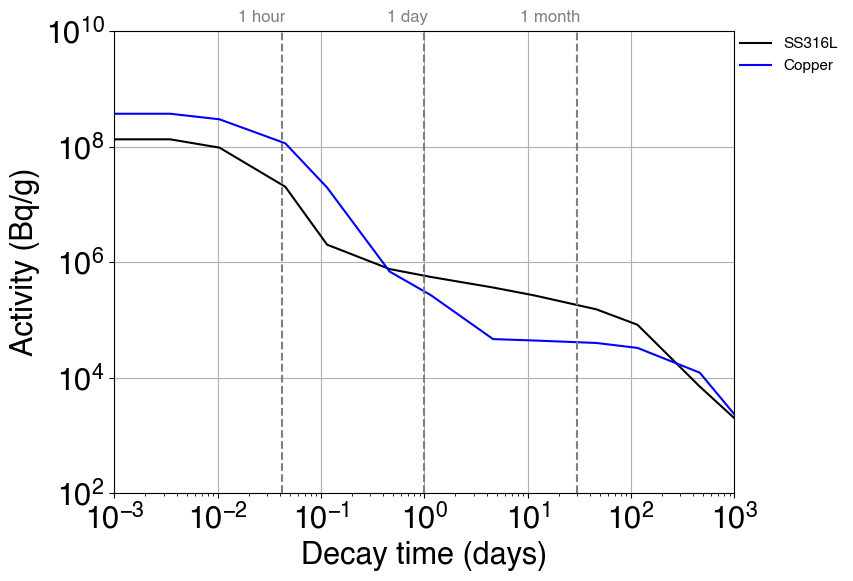

In [68]:
# comparison activity plotting


f2=open(filename2,"r")
lines2=f2.readlines()
timescale2=[]
activity_total2 = []
for x in lines2[8:8+no_of_timesteps]:
    timescale2.append(float(x.split()[1]))
    activity_total2.append(float(x.split()[3]))
isotopes_list2 = []
for z in lines2[7:8]:
    isotopes_list2.append(z.split()[4::1])
    isotopes2=isotopes_list2[0]
total2 = isotopes2[0]
f.close()


fig, ax1 = plt.subplots()
ax1.set_xlabel('Decay time (days)') 
ax1.set_ylabel('Activity (Bq/g)')
#ax1.set_title('DPA vs. Depth')
ax1.tick_params(axis='y')
#ax1.set_xticks([1,1e0,1e1,1e2])
ax1.set_xlim(1e-3,1e3)
ax1.set_xscale("log")
ax1.set_ylim(1e2,1e10)
#ax1.set_yticks([1e6,1e8,1e10,1e12,1e14])
ax1.set_yscale("log")

ax1.plot(timescale_days, 1e-3*np.array(activity_total) , 'Black' , label='SS316L',     linewidth=1.5)
ax1.plot(timescale_days, 1e-3*np.array(activity_total2), 'Blue',     label='Copper', linewidth=1.5)

ax1.axvline(x=0.04167, ls='--', c='grey')
ax1.axvline(x=1e0, ls='--', c='grey')
ax1.axvline(x=30, ls='--', c='grey')
ax1.text(0.2, 1.02, '1 hour', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.44, 1.02, '1 day', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.654, 1.02, '1 month', transform = ax1.transAxes, fontsize=12, c='grey')

ax1.grid(which='major')
ax1.legend(loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0, frameon=False, fontsize=11)
   
fig.set_size_inches((8, 6))
fig.savefig(os.path.join(image_directory2, '1ua1g1hr_activity_cu_v_ss.png'), transparent=False, bbox_inches='tight')

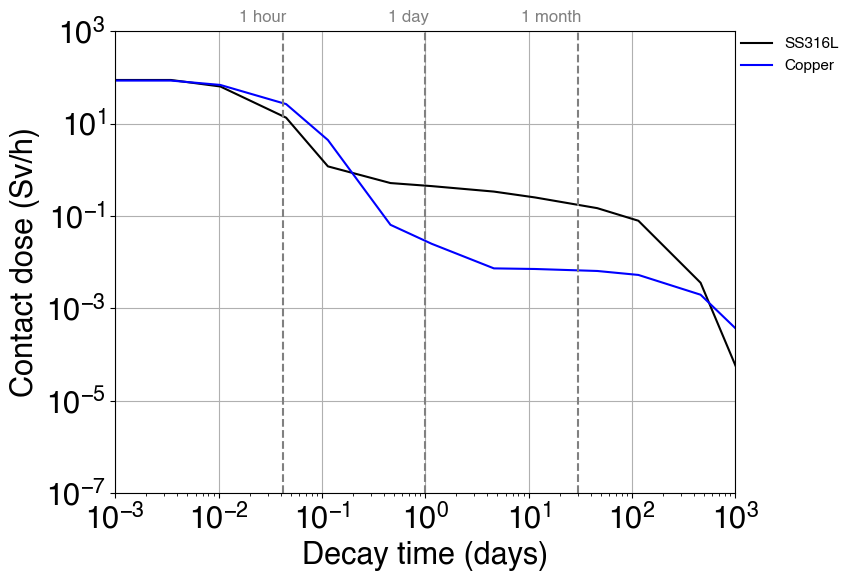

In [70]:
dose_total2 = []
for x in lines2[36+no_of_timesteps:50+no_of_timesteps]:
    dose_total2.append(float(x.split()[3]))
f.close()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Decay time (days)') 
ax1.set_ylabel('Contact dose (Sv/h)')
#ax1.set_title('DPA vs. Depth')
ax1.tick_params(axis='y')
#ax1.set_xticks([1,1e0,1e1,1e2])
ax1.set_xlim(1e-3,1e3)
ax1.set_xscale("log")
ax1.set_ylim(1e-7,1e3)
#ax1.set_yticks([1e6,1e8,1e10,1e12,1e14])
ax1.set_yscale("log")

ax1.plot(timescale_days, (dose_total),'Black' ,      label='SS316L',      linewidth=1.5)
ax1.plot(timescale_days, (dose_total2),'Blue' ,      label='Copper',      linewidth=1.5)

ax1.axvline(x=0.04167, ls='--', c='grey')
ax1.axvline(x=1e0, ls='--', c='grey')
ax1.axvline(x=30, ls='--', c='grey')
ax1.text(0.2, 1.02, '1 hour', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.44, 1.02, '1 day', transform = ax1.transAxes, fontsize=12, c='grey')
ax1.text(0.654, 1.02, '1 month', transform = ax1.transAxes, fontsize=12, c='grey')

ax1.grid(which='major')
ax1.legend(loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0, frameon=False, fontsize=11)
   
fig.set_size_inches((8, 6))
fig.savefig(os.path.join(image_directory2, '1ua1g1hr_dose_cu_v_ss.png'), transparent=False, bbox_inches='tight')